In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [ ]:
!pip install --pre pycaret -q

In [ ]:
from pycaret.classification import *

In [ ]:
df = pd.read_csv('/content/transaction_dataset.csv')

In [ ]:
df.sample(7)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
4168,4168,1236,0x6ef68da7ef835a2dfe7b97ca0954984e7cf3e1db,0,0.00,1574.87,226781.97,0,144,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,None,OmiseGO
841,841,842,0x14b14266bc366a77c4692778ec4b438c4b765d23,0,0.00,2752.56,319297.32,0,116,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,None,DATAcoin
4347,4347,1415,0x736745498a124cde50f9eadaeeee481367237bbd,0,0.00,22478.28,157347.93,0,7,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7857,7857,196,0x159ccffb293a06aafaec1b254a00522a2bc40639,1,0.00,0.00,0.00,0,1,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
2001,2001,2002,0x342b4cd5bfdcdb2c412eb7af31685dd9cf379bd8,0,19507.26,68156.43,564996.67,8,6,0,...,60.950136,60.950136,60.950136,0.0,0.0,0.0,1.0,3.0,EOS,NKN
3325,3325,393,0x57ea6faefa0cc8a6e2e8ca6a5966bcf8f793798f,0,105.38,0.63,317.40,3,2,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
5782,5782,2850,0x9a2561fe4d758a88d39f2d581e470a97fab4cd2b,0,21.36,0.00,64.08,3,1,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
#drop 3  frist columns as they are not necessary
df = df.iloc[:,3:]

In [ ]:
df.shape

(9841, 48)

In [ ]:
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20

In [ ]:
# Finds number of non null values and data type of each column or feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [ ]:
# finds the nature of data in each column
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [ ]:
#Find the number of unique values in each column
for col in df:
  print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

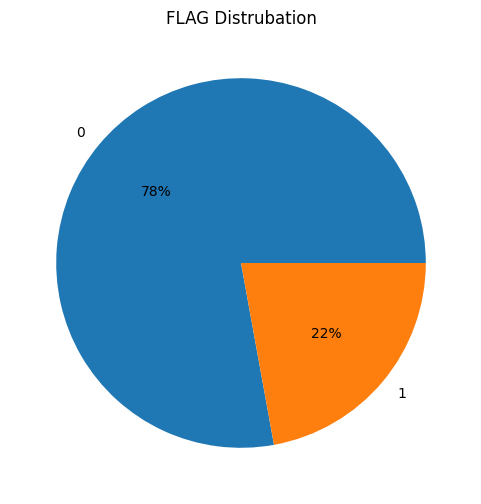

In [ ]:
#distubation of FLAG (for checking whether data is balanced or not) Flag = 0(legit transaction) and Flag = 1(fraud transaction)
plt.figure(figsize=(6,6))
plt.pie(df['FLAG'].value_counts(),labels=df['FLAG'].value_counts().index, autopct='%.0f%%')
plt.title('FLAG Distrubation')
plt.show()

In [ ]:
# drop categorical features
categories = df.select_dtypes('O').columns.astype('category')
df.drop(df[categories], axis=1, inplace=True)
print(df.shape)

(9841, 46)


In [ ]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

In [ ]:
#Recheck for missing values
df.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [ ]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance as these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

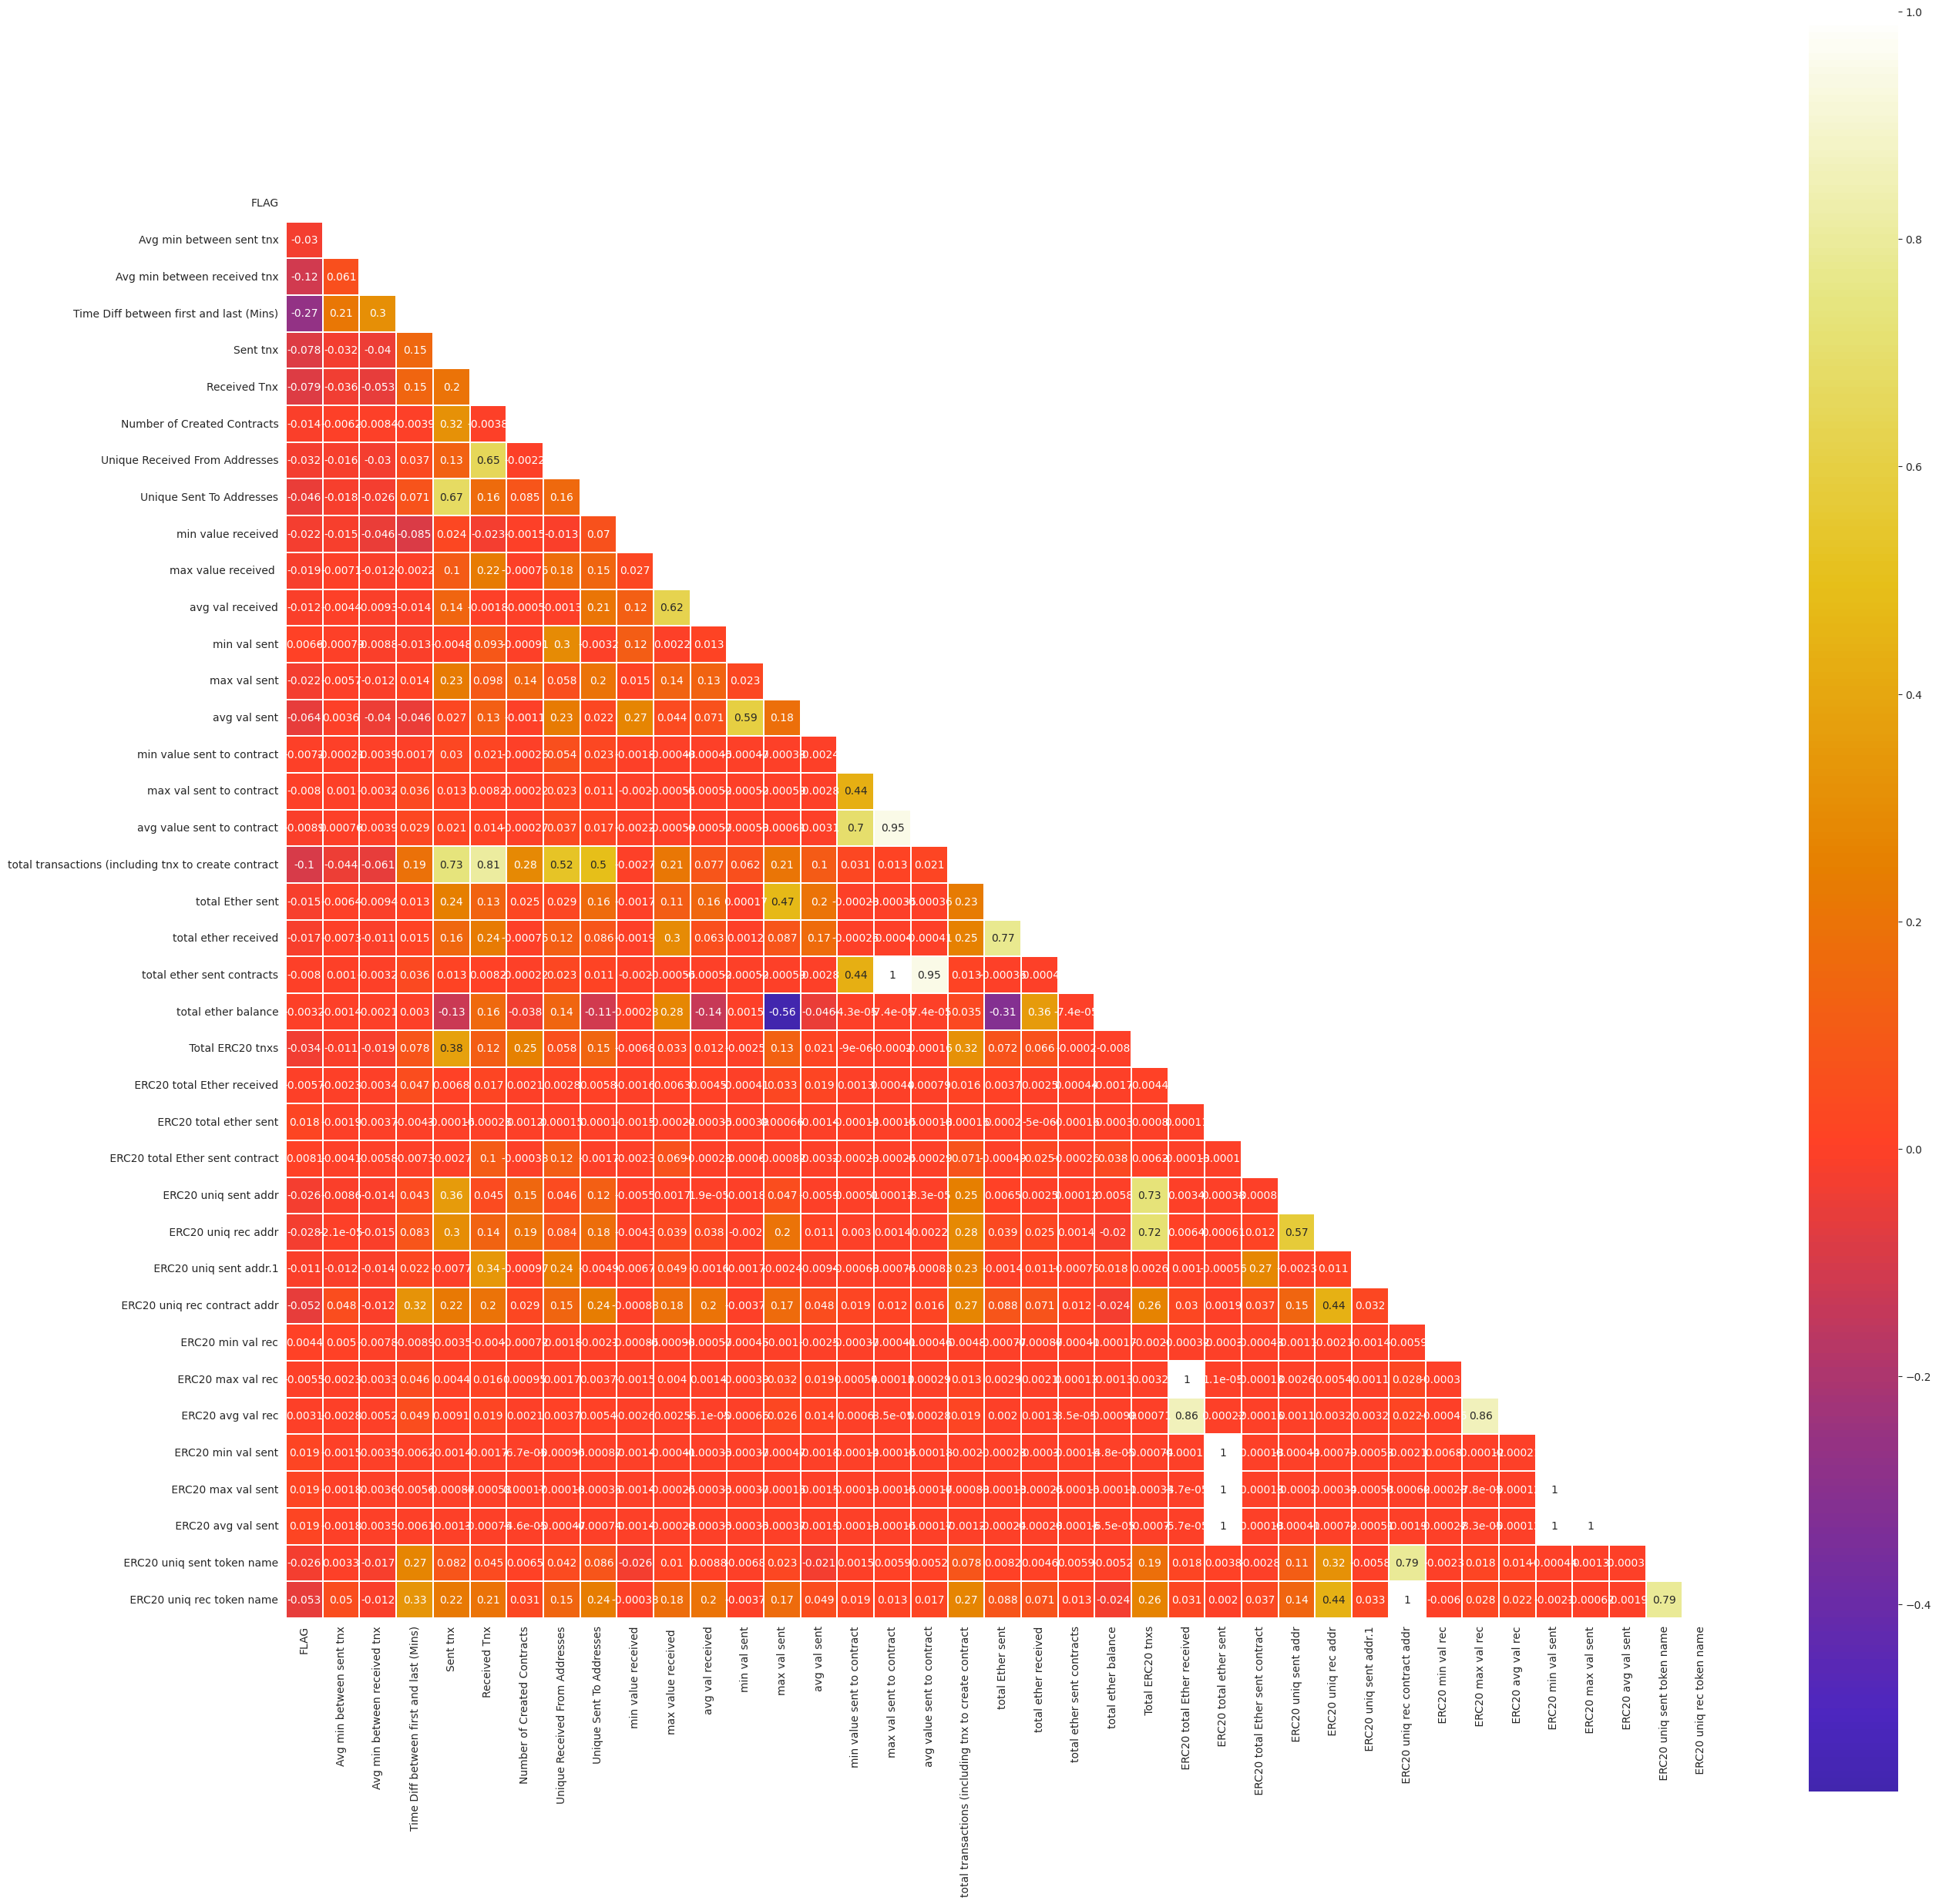

In [ ]:
# Correlation matrix for graphical representation of dependent variables
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [ ]:
print(df.shape)

(9841, 39)


In [ ]:
# Some features having less than 10 unique values
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column max val sent to contract has the following distribution: 
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: max val sent to contract, dtype: int64
The column avg value sent to contract has the following distribution: 
0.000000    9838
0.020000       1
0.010000       1
0.023014       1
Name: avg value sent to contract, dtype: int64
The column total ether sent contracts has the following distribution: 
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: total ether sent contracts, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


In [ ]:
# drop such features
drops = ['min value sent to contract',
         'max val sent to contract',
         'avg value sent to contract',
         'total ether sent contracts',]
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 35)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0


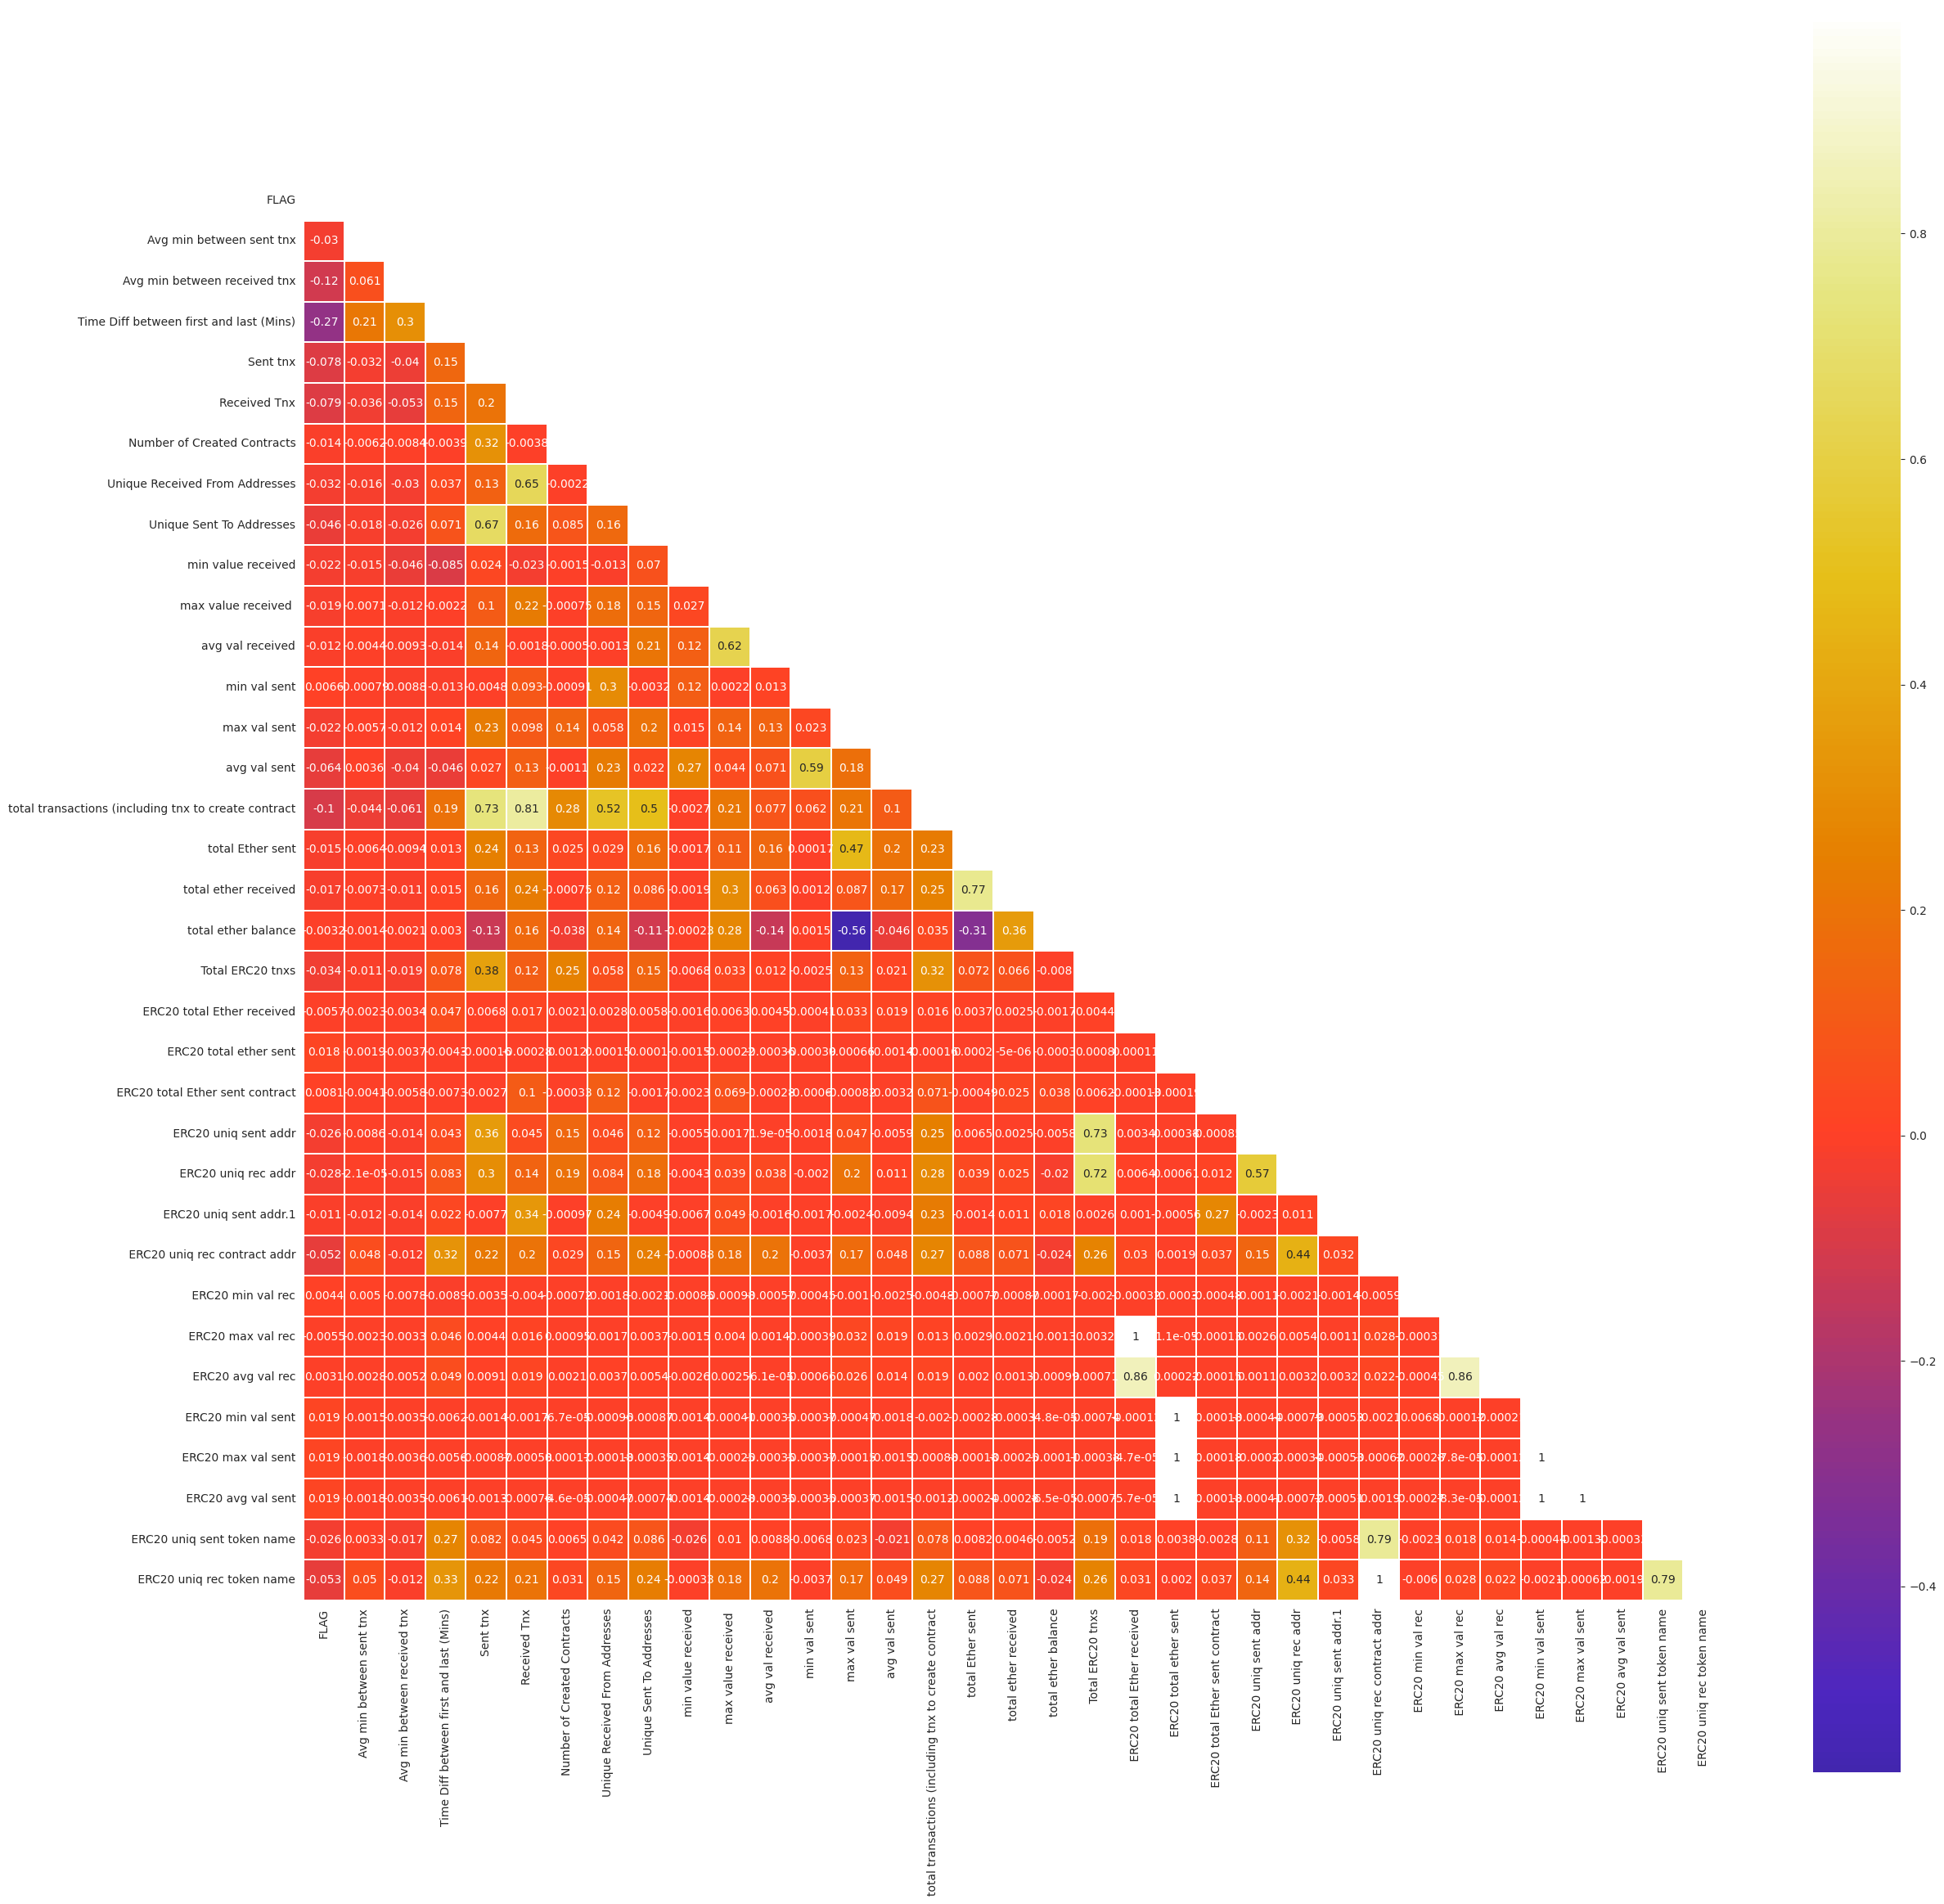

In [ ]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(28,28))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [ ]:
# define X and y where X is the features and y is the target variable (FLAG)
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 34) (9841,)


In [ ]:
# Split into training set (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 34) (7872,)
(1969, 34) (1969,)


In [ ]:
# standardize the data for better performance of the model
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)

In [ ]:
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,-0.038167,0.310581,2.851119,0.001530,-0.133464,-0.025638,-0.066047,0.052558,-0.133168,-0.031784,...,-0.053812,1.799837,-0.025533,-0.044232,-0.019285,-0.011896,-0.011674,-0.011400,2.708340,1.868394
1,-0.238842,-0.339707,-0.675810,-0.153323,-0.176780,-0.025638,-0.106769,-0.098127,-0.133260,-0.043658,...,-0.053812,-0.214189,-0.025533,-0.044520,-0.019322,-0.011896,-0.011726,-0.011409,-0.197341,-0.217464
2,-0.238088,-0.322958,1.063494,1.620329,1.238207,-0.025638,-0.096588,-0.094539,-0.133226,-0.041094,...,-0.053812,-0.273425,-0.025533,-0.044520,-0.019322,-0.011896,-0.011726,-0.011409,-0.197341,-0.278813
3,-0.238842,0.503169,-0.553119,-0.153323,-0.174717,-0.018987,-0.099982,-0.098127,-0.133260,-0.043563,...,-0.053812,-0.273425,-0.025533,-0.044520,-0.019322,-0.011896,-0.011726,-0.011409,-0.197341,-0.278813
4,-0.231326,-0.339693,-0.674831,-0.150720,-0.174717,-0.025638,-0.099982,-0.090952,0.008139,-0.038450,...,-0.053812,-0.273425,-0.025533,-0.044520,-0.019322,-0.011896,-0.011726,-0.011409,-0.197341,-0.278813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.238842,-0.320304,-0.672906,-0.152022,-0.174717,-0.025638,-0.099982,-0.094539,-0.129891,-0.043444,...,-0.053812,-0.214189,-0.025533,-0.044520,-0.019322,-0.011896,-0.011726,-0.011409,-0.197341,-0.217464
7868,-0.160852,-0.250448,0.336370,-0.140310,-0.024143,-0.025638,0.358138,-0.083776,-0.133257,-0.042296,...,-0.053812,0.022755,-0.025533,-0.044512,-0.019319,-0.011896,-0.011726,-0.011409,-0.197341,0.027931
7869,-0.238842,-0.339707,-0.675610,-0.152022,-0.175749,-0.025638,-0.103375,-0.094539,-0.132724,-0.043642,...,-0.053812,-0.273425,-0.025533,-0.044520,-0.019322,-0.011896,-0.011726,-0.011409,-0.197341,-0.278813
7870,0.116065,0.012046,-0.061022,-0.140310,-0.161310,-0.025638,-0.062654,-0.062250,-0.133239,0.158200,...,-0.053812,-0.036481,-0.025451,-0.044517,-0.019321,-0.011896,-0.011726,-0.011409,-0.197341,-0.033418


In [ ]:
# SMOTE to balance the data in the target variable (taking synthetic samples to balance the data in the target variable)
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')

Shape of the training before SMOTE: ((7872, 34), (7872,))


In [ ]:
x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b0bd2016710>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so: cannot open shared object file: No such file or directory


Shape of the training after SMOTE: ((12230, 34), (12230,))


In [ ]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFrauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFrauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Frauds: 6116


In [ ]:
# percentage of frauds before SMOTE
sum(y_test)/len(y_test)

0.2143219908583037

In [ ]:
# percentage of frauds after SMOTE
sum(y_tr_resample)/len(y_tr_resample)

0.5

In [ ]:
#RandomForest Classifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)

# Transform test features (same transformations as done before on training set)
sc_test = sc.transform(X_test)

# Make predictions on test set
preds = RF.predict(sc_test)

In [ ]:
# Importance of each feature on a scale of 0 to 1
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': RF.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
                                               Feature  Importance
23                                ERC20 uniq rec addr    0.115518
18                                   Total ERC20 tnxs    0.098106
33                          ERC20 uniq rec token name    0.094885
25                       ERC20 uniq rec contract addr    0.094833
2             Time Diff between first and last (Mins)    0.094557
1                        Avg min between received tnx    0.061243
10                                   avg val received    0.053552
14  total transactions (including tnx to create co...    0.051994
16                               total ether received    0.042966
6                      Unique Received From Addresses    0.033404
26                                  ERC20 min val rec    0.031898
4                                        Received Tnx    0.025265
9                                 max value received     0.024599
8                                  min value received  

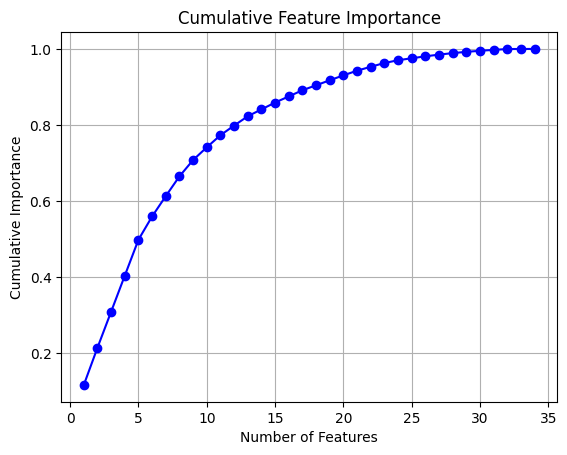

In [ ]:
# calculate cumulative importance of all features
cumulative_importance = np.cumsum(feature_importance['Importance'])

# Plot the cumulative importance
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.96      0.96      0.96       422

    accuracy                           0.98      1969
   macro avg       0.98      0.97      0.98      1969
weighted avg       0.98      0.98      0.98      1969



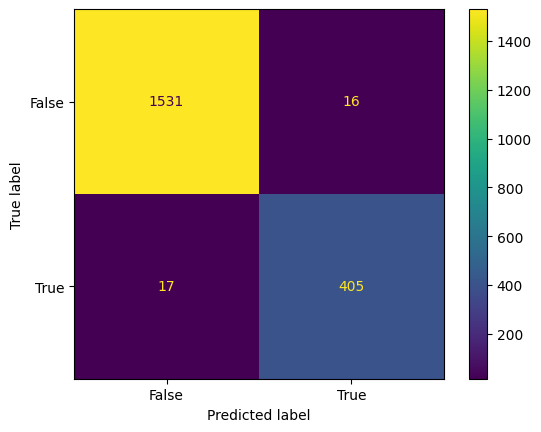

In [ ]:
# calculate accuracy of the model
print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#XGB Classifier
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)

# Transform test features (same transformations as done before on training set)
sc_test = sc.transform(X_test)

# Make predictions on test set
preds = xgb_c.predict(sc_test)

In [ ]:
# Importance of each feature on a scale of 0 to 1
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_c.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
                                               Feature  Importance
18                                   Total ERC20 tnxs    0.455668
2             Time Diff between first and last (Mins)    0.191499
32                         ERC20 uniq sent token name    0.035394
6                      Unique Received From Addresses    0.032248
14  total transactions (including tnx to create co...    0.031221
11                                       min val sent    0.024815
16                               total ether received    0.022103
10                                   avg val received    0.019563
3                                            Sent tnx    0.016169
27                                  ERC20 max val rec    0.015690
4                                        Received Tnx    0.013558
23                                ERC20 uniq rec addr    0.013194
26                                  ERC20 min val rec    0.011386
15                                   total Ether sent  

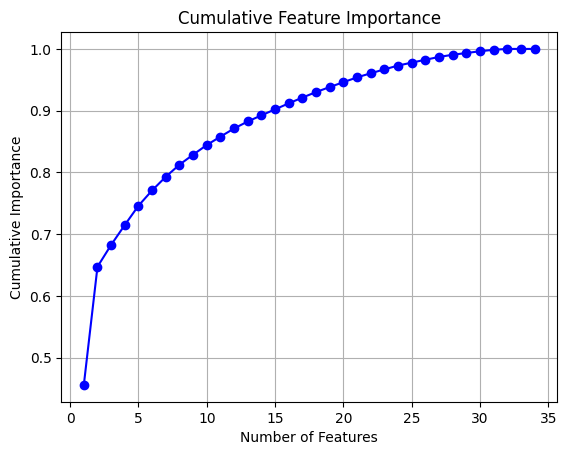

In [ ]:
# calculate cumulative importance of all features
cumulative_importance = np.cumsum(feature_importance['Importance'])

# Plot the cumulative importance
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.96      0.98      0.97       422

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969



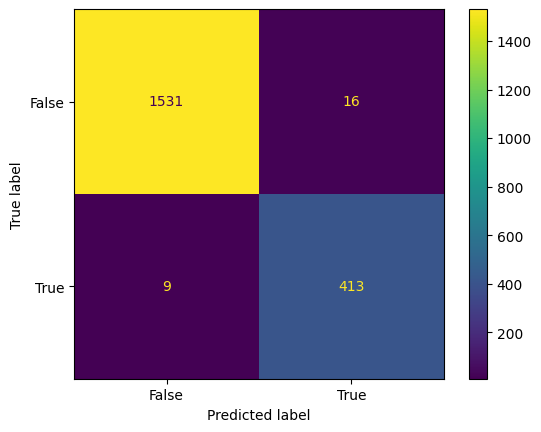

In [ ]:
# calculate accuracy of the model
print(classification_report(y_test, preds))
confusion_matrix_ = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()